# TfidfVectorizer

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import lightgbm as lgb


pd.set_option('display.max_colwidth', None)

train_stop = pd.read_csv('../../Data-Preperation/traindata_with_stopwords_preprocessed.csv')
test_stop = pd.read_csv('../../Data-Preperation/testdata_with_stopwords_preprocessed.csv')
train_no_stop = pd.read_csv('../../Data-Preperation/traindata_without_stopwords_preprocessed.csv')
test_no_stop = pd.read_csv('../../Data-Preperation/testdata_without_stopwords_preprocessed.csv')

# df['Text'] = df['Text'].str.lower()

## ohne Stopwords

In [ ]:
train_no_stop['Text'].astype(str)

In [95]:
vectorizer = TfidfVectorizer()
# astype(str) is necesarry 
X = vectorizer.fit_transform(train_no_stop['Text'].astype(str))
y = train_no_stop['target']

X_test = vectorizer.transform(test_no_stop['Text'].astype(str))
y_test = test_no_stop['target']

### ohne Hyperparameter

In [9]:
model = lgb.LGBMClassifier()

In [10]:
model.fit(X, y)

[LightGBM] [Info] Number of positive: 640000, number of negative: 640000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 31.670596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324517
[LightGBM] [Info] Number of data points in the train set: 1280000, number of used features: 22789
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [11]:
y_pred_lgbm = model.predict(X_test)

<Axes: >

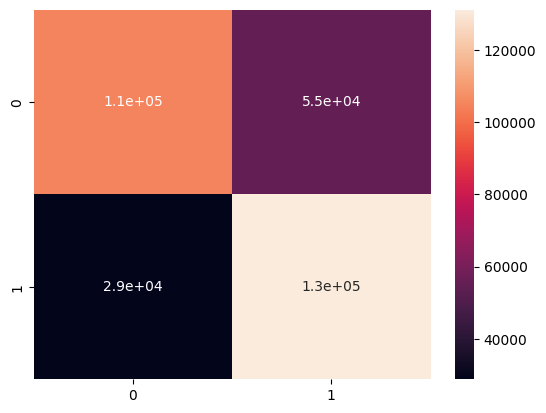

In [12]:
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
np.save('confusion_matrix.npy', cm_lgbm)

sns.heatmap(cm_lgbm, annot=True)

In [13]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_lgbm):.2f}')

Accuracy: 0.74


### mit Hyperparameter

In [96]:
model = lgb.LGBMClassifier(
    num_leaves=300,
)

In [97]:
model.fit(X, y)

[LightGBM] [Info] Number of positive: 640000, number of negative: 640000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 42.958819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 324517
[LightGBM] [Info] Number of data points in the train set: 1280000, number of used features: 22789
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(num_leaves=300)

Accuracy: 0.77


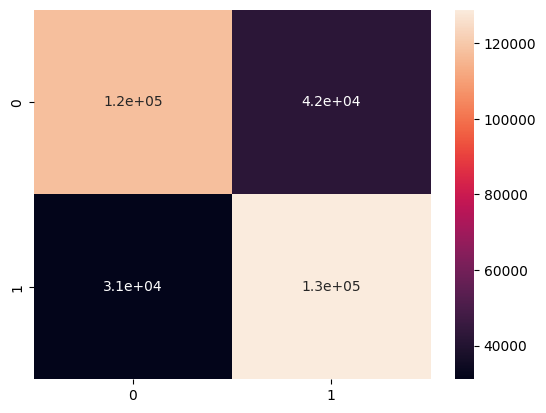

In [98]:
y_pred_lgbm = model.predict(X_test)
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
# np.save('confusion_matrix.npy', cm_lgbm)

sns.heatmap(cm_lgbm, annot=True)
print(f'Accuracy: {accuracy_score(y_test, y_pred_lgbm):.2f}')

## mit Stopwords

In [5]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_stop['Text'].astype(str))
y = train_stop['target']

X_test = vectorizer.transform(test_stop['Text'].astype(str))
y_test = test_stop['target']

### ohne Hyperparameter

In [ ]:
model = lgb.LGBMClassifier()

In [15]:
model.fit(X, y)

[LightGBM] [Info] Number of positive: 640000, number of negative: 640000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 59.179691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 374030
[LightGBM] [Info] Number of data points in the train set: 1280000, number of used features: 27629
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [16]:
y_pred_lgbm = model.predict(X_test)


Accuracy: 0.76


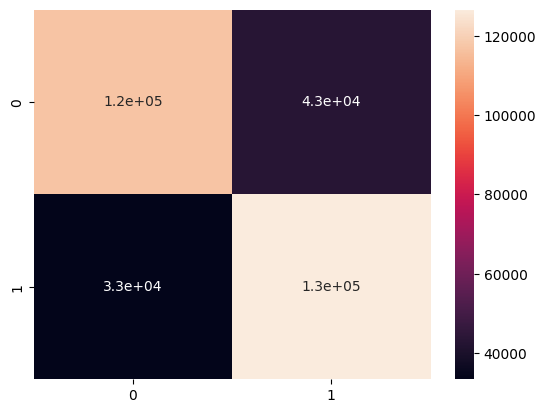

In [17]:
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
np.save('confusion_matrix.npy', cm_lgbm)

sns.heatmap(cm_lgbm, annot=True)

print()
print(f'Accuracy: {accuracy_score(y_test, y_pred_lgbm):.2f}')

### mit Hyperparameter

In [10]:
#accuracy is 0.78
#ca. 2min model.fit

# model = lgb.LGBMClassifier(
#     num_leaves=100,
#     objective='binary',
#     tree_learner='feature',
# )

In [18]:
#accuracy is 0.78
#ca. 2min 40s model.fit

# model = lgb.LGBMClassifier(
#     num_leaves=100,
#     max_bin=512,
#     learning_rate=0.05,
#     num_iterations=200,
# )

In [23]:
#acuracy is 0.75   
#ca. 11min 16s model.fit

# model = lgb.LGBMClassifier(
#     num_leaves=200,
#     max_bin=512,
#     learning_rate=0.02,
#     num_iterations=300,
#     boosting_type='dart',
# )

In [24]:
# nur noch 0.71 accuracy
#ca. 20min model.fit

# model = lgb.LGBMClassifier(
#     # num_leaves=200,
#     max_bin=512,
#     learning_rate=0.02,
#     num_iterations=300,
#     boosting_type='dart',
# )

In [32]:
# nur noch 0.74 accuracy
#ca. 2min 14 model.fit

# model = lgb.LGBMClassifier(
#     boosting_type='dart',
# )

In [33]:
# auch 0.78
#ca. 2min 19 model.fit

# model = lgb.LGBMClassifier(
#     num_leaves=100,
# )

In [45]:
# accuracy 0.79
#ca. 2min 47 model.fit

# model = lgb.LGBMClassifier(
#     num_leaves=200,
# )

In [79]:
# only 0.74
# model = lgb.LGBMClassifier(
#     boosting = 'dart',
# )

In [87]:
# accuracy 0.76
# model = lgb.LGBMClassifier(
#     max_bin=2048,
# )

In [91]:
# accuracy 0.72
# model = lgb.LGBMClassifier(
#     learning_rate=0.05, boosting_type= 'gbdt',
#     objective='binary',
#     metric = ['auc', 'binary_logloss'],
#     num_leaves=100, max_depth=10,
# )
     

In [69]:
# accuracy 0.80
# ca. 4min 37 model.fit

# größere num_leaves bringt bessere nichts mehr

# model = lgb.LGBMClassifier(
#     num_leaves=300,
# )

In [92]:
model.fit(X, y)

[LightGBM] [Info] Number of positive: 640000, number of negative: 640000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 57.731685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 374030
[LightGBM] [Info] Number of data points in the train set: 1280000, number of used features: 27629
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(learning_rate=0.05, max_depth=10,
               metric=['auc', 'binary_logloss'], num_leaves=100,
               objective='binary')

In [93]:
y_pred_lgbm = model.predict(X_test)

Accuracy: 0.72


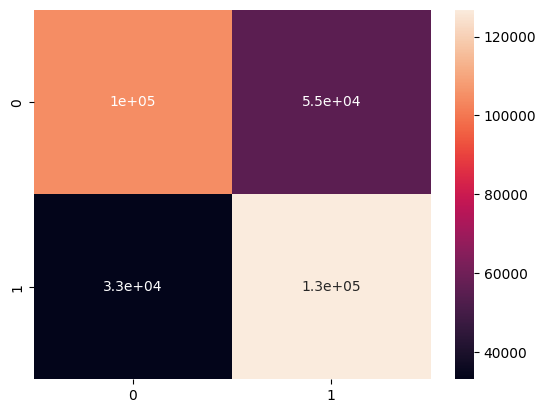

In [94]:
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
np.save('confusion_matrix.npy', cm_lgbm)

sns.heatmap(cm_lgbm, annot=True)

print(f'Accuracy: {accuracy_score(y_test, y_pred_lgbm):.2f}')

# sentence-transformers

In [1]:
import pandas as pd
import numpy as np


from sentence_transformers import SentenceTransformer, util
vectorizer2 = SentenceTransformer('all-mpnet-base-v2')

pd.set_option('display.max_colwidth', None)

train_stop = pd.read_csv('../../Data-Preperation/traindata_with_stopwords_preprocessed.csv')
test_stop = pd.read_csv('../../Data-Preperation/testdata_with_stopwords_preprocessed.csv')
train_no_stop = pd.read_csv('../../Data-Preperation/traindata_without_stopwords_preprocessed.csv')
test_no_stop = pd.read_csv('../../Data-Preperation/testdata_without_stopwords_preprocessed.csv')


/Users/I569423/Library/CloudStorage/OneDrive-Personal/DHBW/4.Semester/DataExploration/Data-Exploration/venv/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
/Users/I569423/Library/CloudStorage/OneDrive-Personal/DHBW/4.Semester/DataExploration/Data-Exploration/venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [2]:
import lightgbm as lgb

In [3]:
X = train_stop['Text'].astype(str)

## mit Stopwords

In [11]:
# je 5000 werte des Targets werden gespalten
df_0 = train_stop[train_stop['target'] == 0]
df_4 = train_stop[train_stop['target'] == 4]

df_cut0 = df_0.iloc[:500]
df_cut4 = df_4.iloc[:500]

result = pd.concat([df_cut0, df_cut4])


dft_0 = test_stop[test_stop['target'] == 0]
dft_4 = test_stop[test_stop['target'] == 4]

dft_cut0 = dft_0.iloc[:500]
dft_cut4 = dft_4.iloc[:500]

test = pd.concat([dft_cut0, dft_cut4])

In [12]:
text = result['Text'].values.tolist()

In [13]:
vectors = [vectorizer2.encode(sentence) for sentence in text]

In [14]:
X = np.array(vectors)
y = result['target']

In [15]:
model = lgb.LGBMClassifier()

In [16]:
model.fit(X, y)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
text = result['Text'].values.tolist()
vectors = [vectorizer2.encode(sentence) for sentence in text]
X_test = np.array(vectors)

In [ ]:
y_pred_lgbm = model.predict(X_test)

In [19]:
embeddings = np.array(vectors)

NameError: name 'vectors' is not defined

In [18]:
embeddings.shape

NameError: name 'embeddings' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
embeddings_findings = np.array(embeddings_findings)